# Prédiction de Défaut de Paiement
Analyse du risque de défaut de paiement sur cartes de crédit
Ce projet repose sur le dataset public intitulé : [Default of Credit Card Clients](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients), qui contient des informations sur les paiements en défaut, les facteurs démographiques, les données de crédit, l'historique des remboursements et les relevés de facturation de clients de cartes de crédit à Taïwan entre avril 2005 et septembre 2005.

L'objectif de ce projet est d'explorer, nettoyer et analyser ce jeu de données, puis de construire des modèles de machine learning capables de prédire si un client est susceptible de ne pas rembourser sa carte de crédit le mois suivant.

---
Analyse du risque de défaut de paiement sur cartes de credit 
ce projet repose sur le datset public intitulé les paiement en défaut les facteurs 

## Description des variables

Le dataset contient **30 000 lignes** et **25 variables** :

- `ID` : Identifiant unique du client  
- `LIMIT_BAL` : Montant du crédit accordé en dollars NT (incluant crédit individuel et familial)  
- `SEX` : Sexe (1 = homme, 2 = femme)  
- `EDUCATION` : Niveau d’éducation (1 = école supérieure, 2 = université, 3 = lycée, 4 = autres, 5 et 6 = inconnu)  
- `MARRIAGE` : Statut marital (1 = marié, 2 = célibataire, 3 = autres)  
- `AGE` : Âge du client (en années)  
- `PAY_0` à `PAY_6` : Historique des remboursements mensuels (de septembre à avril 2005 ; -1 = paiement dans les temps, 1 = un mois de retard, etc.)  
- `BILL_AMT1` à `BILL_AMT6` : Montants des relevés de facturation mensuels (de septembre à avril 2005, en dollars NT)  
- `PAY_AMT1` à `PAY_AMT6` : Montants des paiements précédents mensuels (de septembre à avril 2005, en dollars NT)  
- `default.payment.next.month` : Défaut de paiement le mois suivant (1 = oui, 0 = non)  

---


# Importation bibliothèques de base

In [4]:
# la manipulation et l'analyse des données
import numpy as np   
import pandas as pd  

# Importation des bibliothèques de visualisation
import matplotlib.pyplot as plt   
import seaborn as sns   

# Paramètres d'affichage pour les graphiques
%matplotlib inline   
sns.set(style="whitegrid")   
plt.rcParams["figure.figsize"] = (10, 6) 

In [5]:
# Chargement du jeu de données
credit = pd.read_csv('UCI_Credit_Card.csv')

# Affichage des 5 premières lignes du dataset
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# dimension (nombre de lignes et de colonnes)

print(credit.shape)

(30000, 25)


## Étape 1 : Vérification des valeurs manquantes

In [7]:
# Vérification des valeurs manquantes
credit.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

## Analyse des valeurs uniques dans les variables de remboursement (`PAY_`)


In [5]:
pay_columns = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for col in pay_columns:
    print(f"Valeurs uniques dans {col} : {sorted(credit[col].unique())}")


Valeurs uniques dans PAY_0 : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques dans PAY_2 : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques dans PAY_3 : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques dans PAY_4 : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques dans PAY_5 : [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques dans PAY_6 : [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


### Remarque :
* Le code -2 n’est pas officiellement expliqué dans la description du dataset. Il est probablement :
    * Soit une erreur de saisie ou de prétraitement,
    * Soit un code interne qui pourrait signifier par exemple : "aucune carte de crédit active ce mois-là" ou "aucune donnée disponible".
* -1 : Paiement effectué à temps
* 0	: Aucun paiement effectué, mais pas de retard enregistré
* 1-8 : Retard de 1 à 8 mois

## Description des retards de paiement mensuels (`PAY_0` à `PAY_6`)

In [6]:
credit[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [11]:
## Description des variables catégorielles (`SEX`, `EDUCATION`, `MARRIAGE`)
credit[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


### Description des variables catégorielles
Aucune donnée manquante, mais quelques éléments anormaux :
* SEX : valeurs 1 (homme) et 2 (femme), avec un peu plus de femmes que d’hommes.
* EDUCATION : valeurs entre 0 et 6, présence de valeurs anormales (0), majorité avec un niveau universitaire (2).
* MARRIAGE : valeurs entre 0 et 3, 0 est anormal, la plupart sont célibataires (2).



## distributions âge et nombre de clients :

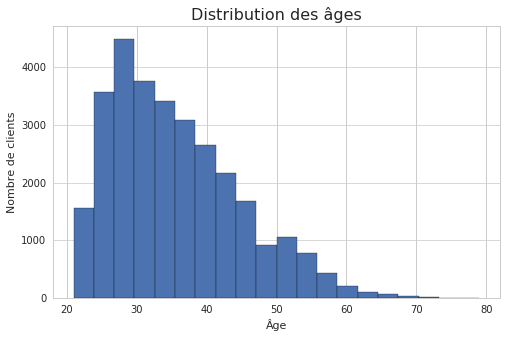

In [7]:
plt.figure(figsize=(8,5))
credit['AGE'].hist(bins=20, edgecolor='black')
plt.title("Distribution des âges", fontsize=16)
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [8]:
# Description du relevé de facture

credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


* Les montants moyens varient entre 38 800 et 51 200 NT dollars avec une grande dispersion.
* Certaines valeurs négatives sont présentes, ce qui est anormal.
* On note aussi des montants très élevés, indiquant des valeurs extrêmes.

## Description des montants des paiements précédents

In [9]:
#Previous Payment Description
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


* Les montants moyens des paiements varient entre environ 4 800 et 5 900 NT dollars, avec une forte dispersion (écarts-types élevés).
* On observe de nombreux paiements nuls (0), ce qui peut correspondre à l'absence de paiement certains mois.
* Des valeurs très élevées sont également présentes, indiquant des paiements importants ou des outliers.

## Description du montant du crédit accordé (LIMIT_BAL)

In [15]:
credit.LIMIT_BAL.describe()


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

* Le crédit moyen accordé est d’environ 167 484 NT dollars, avec une forte variation (écart-type ~129 748).
* Les montants varient de 10 000 NT dollars à 1 000 000 NT dollars.
* La médiane (140 000) montre que la moitié des clients ont un crédit inférieur à ce montant.

## Renommer la colonne default.payment.next.month

In [7]:
credit = credit.rename(columns={'default.payment.next.month': 'default_payment_next_month'})
credit.default_payment_next_month.describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_payment_next_month, dtype: float64

* 0 signifie que le client n’a pas fait de défaut de paiement le mois suivant,
* 1 signifie qu’il a fait défaut.

* Sur les 30 000 clients, environ 22,12 % (moyenne = 0,2212) ont fait défaut.

* La majorité (75 %) n’a pas fait défaut (valeur 0).

* L’écart-type de 0,415 indique une variabilité conforme à une variable binaire.

## Visualisation de la variable : default_payment_next_month

Text(0.5,1,'Répartition des défauts de paiement')

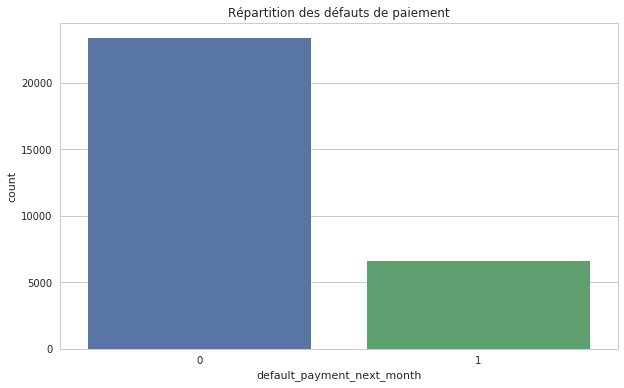

In [12]:
sns.countplot(data=credit, x='default_payment_next_month')
plt.title("Répartition des défauts de paiement")


## Estimation de la probabilité globale de défaut de paiement

In [13]:
# La probabilité générale de défaut de paiement 

credit.default_payment_next_month.sum() / len(credit.default_payment_next_month)

## default_payment_next_month.sum() : compte le nombre total de défauts (somme des 1 dans la colonne).

## len(credit.default_payment_next_month) : donne le nombre total de clients (lignes).

0.2212

* Environ 22,12 % des clients ont fait défaut sur leur paiement le mois suivant

# Machine Learning à l’aveugle : premiers tests

Dans cette première étape, j'adopte une approche dite *"blind"*, c’est-à-dire sans ingénierie de variables ni traitement avancé. Le but est d’utiliser les algorithmes de classification **tels quels**, afin de constituer une base de performance de référence.

### Problème de classification

Comme il s'agit d'un **problème de classification binaire** (défaut de paiement ou non), plusieurs algorithmes peuvent être utilisés :

- Régression logistique  
- Arbre de décision  
- Forêt aléatoire (Random Forest)
- XGBoost
- et d'autres :
    - Support Vector Machine (SVM)  
    - Descente de gradient stochastique (SGD)  
    - k-plus proches voisins (k-NN)  
    - Classification par processus gaussiens  
    - Méthodes ensemblistes (bagging, boosting)  
    - Réseaux de neurones  
    

### Premier test : Arbre de décision

Je commence par un **arbre de décision**. C’est un algorithme simple, interprétable, et capable de gérer à la fois des variables numériques et catégorielles.

Cependant, il est **sensible au surapprentissage** (*overfitting*) : si l’arbre est trop profond, il modélisera trop bien les données d’entraînement mais généralisera mal. Il peut également être **instable**, car de petits changements dans les données peuvent fortement modifier sa structure.

Pour cette raison, on utilise souvent des **méthodes ensemblistes** comme **Random Forest** ou **XGBoost** pour en atténuer les faiblesses.

Dans un premier temps, j'entraînerai un arbre de décision avec des **paramètres par défaut**, avant d'explorer des stratégies de réglage plus avancées.



## Importation des bibliothèques nécessaires pour l'Arbre de Décision

In [9]:
from sklearn.tree import DecisionTreeClassifier            # Modèle d'arbre de décision
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report # Métriques de performance
from sklearn.model_selection import train_test_split       # Séparation des données en train/test


##  Définition de la variable cible : default_payment_next_month

In [13]:
## Variable cible 

y = credit['default_payment_next_month'].copy()
y.sample(5)

5441     0
25692    0
12938    0
14350    0
22266    1
Name: default_payment_next_month, dtype: int64

## Définition des variables explicatives


In [11]:
variables_explicatives  = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

# Création du DataFrame contenant les features
X = credit[variables_explicatives ].copy()

# Affichage des noms de colonnes sélectionnées
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [14]:
# Séparation des données en ensemble d'entraînement et de test

# - 80 % pour l'entraînement
# - 20 % pour le test (évaluation)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [19]:
# Vérification de la cohérence de la variable cible dans les différents ensembles

print("Répartition globale (ensemble complet) :")
print(credit['default_payment_next_month'].describe())

print("\n Ensemble d'entraînement :")
print(y_train.describe())

print("\n Ensemble de test :")
print(y_test.describe())


Répartition globale (ensemble complet) :
count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_payment_next_month, dtype: float64

 Ensemble d'entraînement :
count    24000.000000
mean         0.221792
std          0.415460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_payment_next_month, dtype: float64

 Ensemble de test :
count    6000.000000
mean        0.218833
std         0.413490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default_payment_next_month, dtype: float64


## Création du classificateur : **Arbre de Décision**  (Entraînement et Évaluation )


In [20]:
# Création du classificateur : Arbre de Décision

classifier = DecisionTreeClassifier(max_depth=10, random_state=14)  # profondeur maximale fixée à 10

# Entraînement du modèle sur les données d'entraînement
classifier.fit(X_train, y_train)

# Prédictions sur les données de test
predictions = classifier.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print(f" Précision du modèle : {accuracy:.4f}")


 Précision du modèle : 0.8120


Le modèle a correctement prédit le défaut de paiement dans **81,2 %** des cas sur les données de **test**.
C’est un bon point de départ, mais cette métrique ne suffit pas à elle seule : il est important d’analyser la matrice de confusion, le rappel et la précision surtout si les classes sont déséquilibrées.

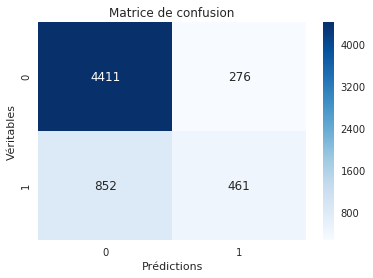

Rapport de classification :

               precision    recall  f1-score   support

Pas de défaut       0.84      0.94      0.89      4687
       Défaut       0.63      0.35      0.45      1313

  avg / total       0.79      0.81      0.79      6000



In [21]:
# 1. Matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
plt.show()

# 2. Rapport de classification
report = classification_report(y_test, predictions, target_names=["Pas de défaut", "Défaut"])
print("Rapport de classification :\n")
print(report)


## Interprétation rapide :

* Très bonne performance sur les clients sans défaut de paiement (84 % de précision, 94 % de rappel).
* Faible capacité à détecter les clients en défaut (seulement 35 % de rappel).
* **Cela signifie que le modèle identifie bien les bons payeurs, mais rate beaucoup de défauts, ce qui est risqué pour une banque.**

In [22]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print(f"Précision du modèle avec max_depth=100 : {accuracy:.4f}")


Précision du modèle avec max_depth=100 : 0.7232


Quand on augmente la profondeur maximale de l’arbre de décision à 100, le modèle devient beaucoup plus complexe. Il essaie de parfaitement ajuster les données d’entraînement, ce qui peut sembler bien sur ces données.

Mais sur les données de test, ce modèle trop complexe performe moins bien (précision de 72,32 %) comparé à un arbre plus simple avec une profondeur de 10 (précision de 81,20 %).

Cela signifie que le modèle « surapprend » (overfitting) : il capture trop de détails et de bruit spécifiques aux données d’entraînement, au lieu d’apprendre les tendances générales utiles pour faire des prédictions sur de nouvelles données.

En résumé : un modèle trop complexe ne garantit pas de meilleures performances. Il faut trouver un équilibre, souvent avec des modèles moins profonds ou en utilisant des techniques qui limitent le surapprentissage.

## Forêt Aléatoire

 Random Forest - Accuracy : 0.819333333333

              precision    recall  f1-score   support

          0       0.84      0.95      0.89      4687
          1       0.66      0.35      0.46      1313

avg / total       0.80      0.82      0.80      6000



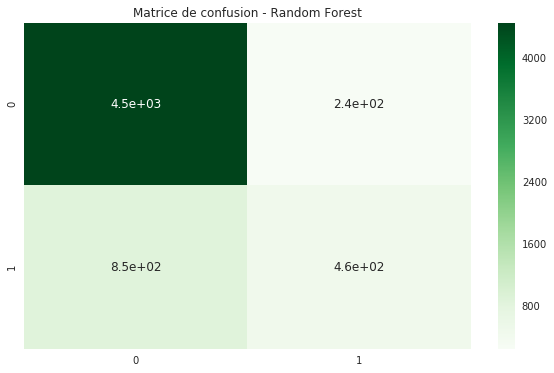

In [27]:
#  Modèle 2 : Random Forest
# -------------------------------
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

print(" Random Forest - Accuracy :", accuracy_score(y_test, predictions_rf))
print("\n", classification_report(y_test, predictions_rf))
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot=True, cmap='Greens')
plt.title("Matrice de confusion - Random Forest")
plt.show()

## Régression Logistique

 Régression Logistique - Accuracy : 0.781166666667

              precision    recall  f1-score   support

          0       0.78      1.00      0.88      4687
          1       0.00      0.00      0.00      1313

avg / total       0.61      0.78      0.69      6000



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


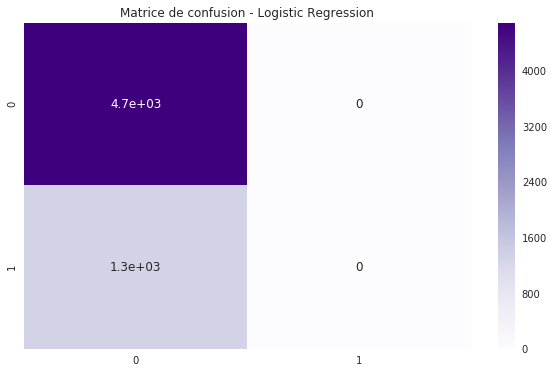

In [26]:
#Modèle 3 : Régression Logistique
from sklearn.linear_model import LogisticRegression
# -------------------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

print(" Régression Logistique - Accuracy :", accuracy_score(y_test, predictions_lr))
print("\n", classification_report(y_test, predictions_lr))
sns.heatmap(confusion_matrix(y_test, predictions_lr), annot=True, cmap='Purples')
plt.title("Matrice de confusion - Logistic Regression")
plt.show()

In [25]:
import xgboost as xgb

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Créer le modèle XGBoost (classifier)
model = xgb.XGBClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur le test
predictions = model.predict(X_test)

# Évaluer
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nRapport de classification :\n", classification_report(y_test, predictions))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, predictions))


Accuracy: 0.8225

Rapport de classification :
              precision    recall  f1-score   support

          0       0.84      0.95      0.89      4687
          1       0.68      0.36      0.47      1313

avg / total       0.81      0.82      0.80      6000


Matrice de confusion :
 [[4460  227]
 [ 838  475]]


Le modèle XGBoost atteint une précision globale d’environ 82,25%.
* Pour la classe 0 (pas de défaut), il performe bien avec une précision de 84% et un rappel élevé de 95%, détectant efficacement les clients fiables.
* Pour la classe 1 (défaut), la précision est correcte (67%), mais le rappel reste faible (37%), indiquant que beaucoup de défauts ne sont pas détectés (faux négatifs élevés).
* La matrice de confusion montre 833 défauts non détectés contre 480 bien identifiés.

En résumé, XGBoost est performant pour reconnaître les bons payeurs, mais comme le modèle précédent, il a du mal à détecter tous les cas de défaut.

## Optimisation des hyperparamètres avec GridSearchCV

Il est facile de mal paramétrer un modèle. Une meilleure approche consiste à utiliser **`GridSearchCV`**, qui teste automatiquement toutes les combinaisons possibles dans un espace de paramètres, afin d’identifier la meilleure configuration.

**Attention** : plus la grille de paramètres est étendue, plus le temps d’exécution sera long, car le modèle est testé avec chaque combinaison.

### Paramètres courants à optimiser

- **`criterion`** :  
  - `gini` : mesure la fréquence à laquelle un élément aléatoire serait mal classé.  
  - `entropy` : mesure la quantité d'information gagnée par chaque séparation.

- **`max_depth`** : profondeur maximale de l’arbre (nombre de niveaux de décision).

- **`max_leaf_nodes`** : nombre maximal de nœuds feuilles dans l’arbre.

- **`min_samples_split`** : nombre minimal d'échantillons requis pour diviser un nœud.  
  → Cela permet d’éviter le **surapprentissage** (overfitting).

---

L’objectif est de construire un modèle plus robuste et plus généralisable, en choisissant automatiquement les paramètres les plus efficaces.


In [28]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [29]:
#  Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Définition du modèle de base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#  Grille des hyperparamètres à tester
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

#  Recherche avec validation croisée
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

#  Lancement de la recherche
grid_search.fit(X_train, y_train)

#  Meilleurs paramètres
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

# Prédictions finales avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluation des performances
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.4min finished


Meilleurs paramètres trouvés :
{'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Accuracy: 0.821333333333

Matrice de confusion :
 [[4473  214]
 [ 858  455]]

Rapport de classification :
              precision    recall  f1-score   support

          0       0.84      0.95      0.89      4687
          1       0.68      0.35      0.46      1313

avg / total       0.80      0.82      0.80      6000



In [31]:
# définition des paramètres
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.821291666667


In [32]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.82099999999999995

## La validation croisée (cross-validation) et de l’outil KFold de scikit-learn.

Pourquoi faire une validation croisée ?

Quand on entraîne un modèle, il est facile d’obtenir de bons résultats juste par chance sur un échantillon particulier.
La validation croisée permet de :
* Mieux évaluer la robustesse de ton modèle.
* Éviter le surapprentissage.
* Avoir une évaluation plus fiable des performances générales.

In [33]:
from sklearn.model_selection import KFold

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier

# Initialisation du modèle
model = XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Définir KFold (ici 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Obtenir les scores sur chaque fold avec cross_val_score
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Afficher les résultats
print("Scores de validation croisée :", scores)
print("Précision moyenne :", np.mean(scores))


Scores de validation croisée : [ 0.82166667  0.819       0.82866667  0.81616667  0.81516667]
Précision moyenne : 0.820133333333


* Stabilité : La faible variation entre les scores montre que le modèle XGBoost généralise bien, sans sur-apprentissage évident.

* Bonne performance : Une précision de plus de 82 % est correcte pour un problème de défaut de paiement (où l'erreur peut coûter cher).

##  LightGBM

In [24]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_train, y_train)
predictions_lgb = model_lgb.predict(X_test)

print(" LightGBM - Accuracy :", accuracy_score(y_test, predictions_lgb))
print(classification_report(y_test, predictions_lgb))


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


🎯 LightGBM - Accuracy : 0.821333333333
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4687
          1       0.68      0.35      0.46      1313

avg / total       0.80      0.82      0.80      6000



Now, this does not mean much now, since it is only one model and, depending on how we split the df into train and test, we get  a precision between 0.816 and 0.8275, which may or may not be relevant depending on the purpose of the model. However, in the future we will compare different models in order to find the one more stable and this small experiment will be useful (I hope, I really don't know much). 

Next, we can see how important are our features for this model.

## Gradient Boosting Classifier (une autre version boostée, native de sklearn)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)

print(" Gradient Boosting - Accuracy :", accuracy_score(y_test, predictions_gb))
print(classification_report(y_test, predictions_gb))


 Gradient Boosting - Accuracy : 0.819833333333
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4687
          1       0.67      0.35      0.46      1313

avg / total       0.80      0.82      0.80      6000



## Analyse des Résultats de la Matrice de Confusion

In [29]:
# Vrai Positif (VP) : prédiction = 1 (défaut), et la vérité est 1 (défaut)
VP = np.sum(np.logical_and(predictions == 1, y_test == 1))

# Vrai Négatif (VN) : prédiction = 0 (pas de défaut), et la vérité est 0 (pas de défaut)
VN = np.sum(np.logical_and(predictions == 0, y_test == 0))

# Faux Positif (FP) : prédiction = 1 (défaut), mais la vérité est 0 (pas de défaut)
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))

# Faux Négatif (FN) : prédiction = 0 (pas de défaut), mais la vérité est 1 (défaut)
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))

print(f"VP (Vrai Positif) : {VP}, FP (Faux Positif) : {FP}, VN (Vrai Négatif) : {VN}, FN (Faux Négatif) : {FN}")


TP: 475, FP: 227, TN: 4460, FN: 838


Dans cette analyse des prédictions du modèle, nous observons les valeurs suivantes :

- **Vrais Positifs (TP) = 475** : Le modèle a correctement identifié 475 clients susceptibles de défaut de paiement.
- **Faux Positifs (FP) = 227** : 227 clients ont été incorrectement prédits comme à risque, alors qu’ils ne le sont pas (faux alarmes).
- **Vrais Négatifs (TN) = 4460** : Le modèle a correctement reconnu 4460 clients sans risque de défaut.
- **Faux Négatifs (FN) = 838** : 838 clients présentant un risque réel n’ont pas été détectés par le modèle (défauts non prévus).

---

Ces résultats montrent que, bien que le modèle soit performant pour identifier correctement la majorité des clients sans défaut (TN élevé), il reste une marge d’amélioration importante dans la détection des clients à risque, notamment à cause du nombre non négligeable de faux négatifs (FN). Réduire ces faux négatifs est crucial pour limiter les pertes liées aux défauts de paiement non anticipés.


# Exploration plus approfondie des données

Nous allons maintenant reprendre l’exploration du dataset, effectuer un nettoyage plus précis et générer de nouvelles **variables explicatives** pour améliorer les modèles.

---

# Analyse des variables catégorielles

Les variables **catégorielles** de notre dataset sont :

- `SEX` (genre)
- `MARRIAGE` (statut marital)
- `EDUCATION` (niveau d’éducation)

Ces variables peuvent comporter des **classes peu représentées**, ce qui peut induire un **surapprentissage (overfitting)**. Il est donc important de vérifier la distribution de ces catégories.



In [36]:
credit.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Le dataset contient une majorité de **femmes** (~60 %) avec **18 112 occurrences** (`2 = Femme`) contre **11 888 hommes** (`1 = Homme`).


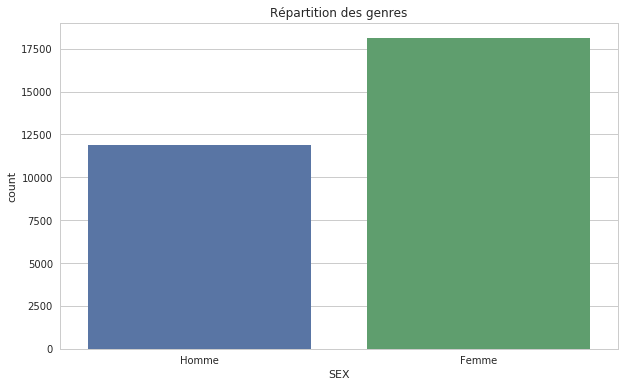

In [35]:
## Distribution de `SEX`

sns.countplot(x='SEX', data=credit)
plt.title("Répartition des genres")
plt.xticks([0, 1], ['Homme', 'Femme'])
plt.show()

In [38]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


- **Célibataires** (`2`) : 15 964  
- **Mariés** (`1`) : 13 659  
- **Autres** (`3`) : 323  
- **Non défini** (`0`) : 54  

 Les catégories `3` et `0` sont très rares et représentent **moins de 2 %** des données.



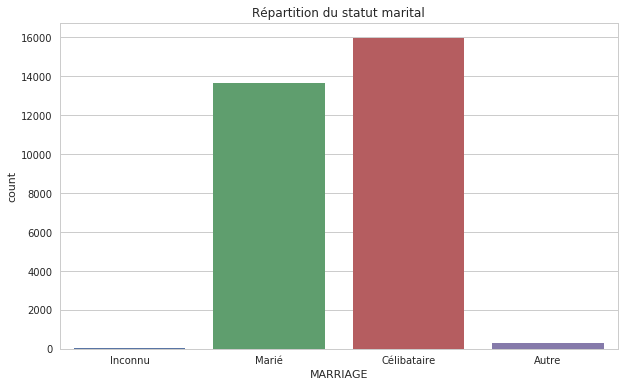

In [39]:
sns.countplot(x='MARRIAGE', data=credit)
plt.title("Répartition du statut marital")
plt.xticks([0, 1, 2, 3], ['Inconnu', 'Marié', 'Célibataire', 'Autre'])
plt.show()


In [43]:
credit.EDUCATION.value_counts() # yes, I am using different ways of calling a column

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


Trois niveaux dominent :
- **Université** (`2`) : 14 030  
- **École supérieure** (`1`) : 10 585  
- **Lycée** (`3`) : 4 917  

 Les autres niveaux (`0`, `4`, `5`, `6`) sont **marginaux** et pourraient être regroupés dans une seule catégorie **"Autre / Inconnu"** pour simplifier l’analyse.


If you are fancy people (and, let's face it, you are) you might speed up the exploration by just looking at a bar plot

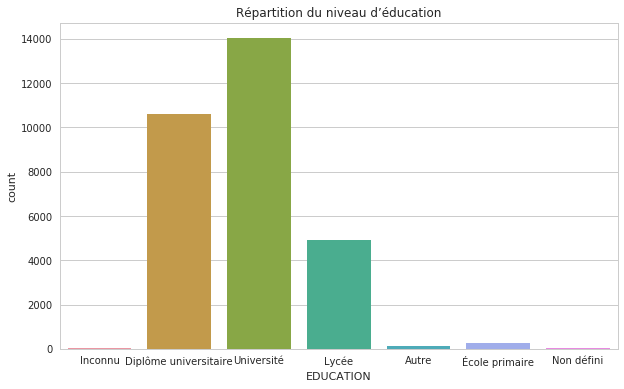

In [40]:
sns.countplot(x='EDUCATION', data=credit)
plt.title("Répartition du niveau d’éducation")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Inconnu', 'Diplôme universitaire', 'Université', 'Lycée', 'Autre', 'École primaire', 'Non défini'])
plt.show()


# Taux de défaut de paiement par sexe

In [42]:
pd.crosstab(credit['SEX'], credit['default_payment_next_month'], normalize='index')


default_payment_next_month,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763


- Les hommes (catégorie 1) présentent un taux de défaut légèrement plus élevé (24,2 %) que les femmes (20,8 %).
- Autrement dit, dans cet échantillon, les femmes ont un comportement de paiement légèrement plus fiable en moyenne.

## Analyse des variables numériques : Montants de facturation mensuels (`BILL_AMT1` à `BILL_AMT6`)

Nous utilisons ici des histogrammes pour examiner la **distribution** des montants de facturation mensuels sur les six derniers mois (de septembre à avril 2005).

##  Objectifs :
- Identifier la forme des distributions (normale, biaisée, etc.)
- Détecter la présence d’**outliers** (valeurs extrêmes)
- Vérifier si les montants suivent une certaine **cohérence dans le temps**

## Observations potentielles :
- Des distributions **asymétriques** : beaucoup de clients ont de faibles montants, quelques-uns ont des montants très élevés.
- Des pics autour de zéro (clients sans dettes ou paiement à temps ?).
- Certains mois peuvent avoir des valeurs manquantes ou incohérentes.

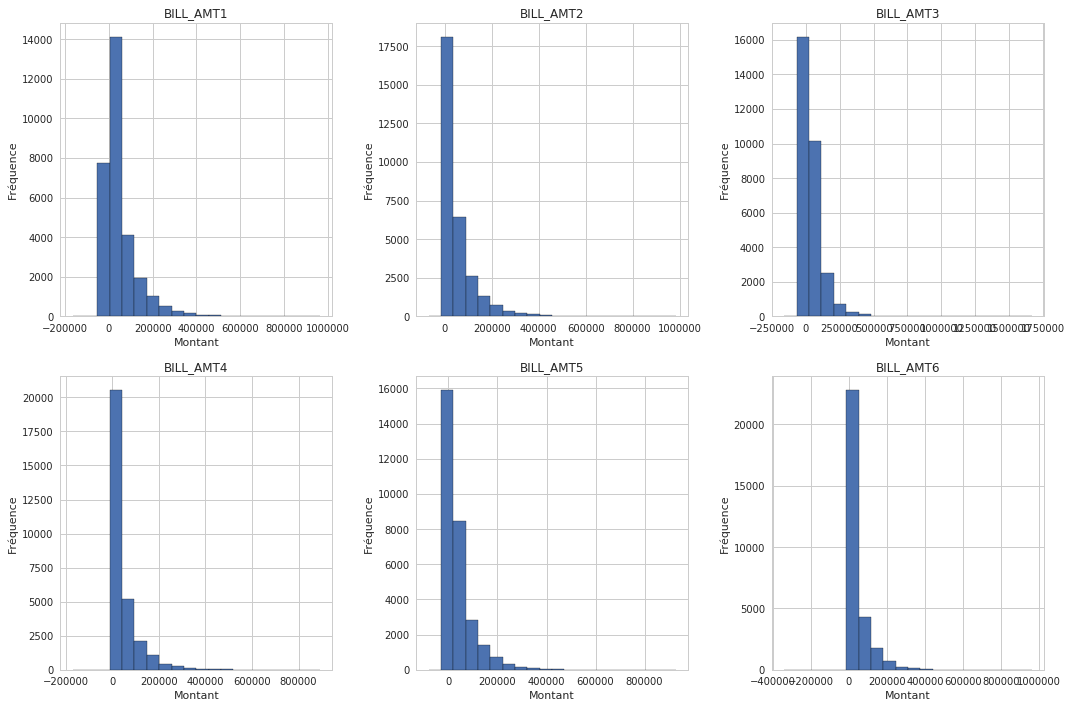

In [51]:
## Tracer les histogrammes pour les variables BILL_AMT

bills = credit[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

plt.figure(figsize=(15, 10))

for i, column in enumerate(bills.columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(bills[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.xlabel("Montant")
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


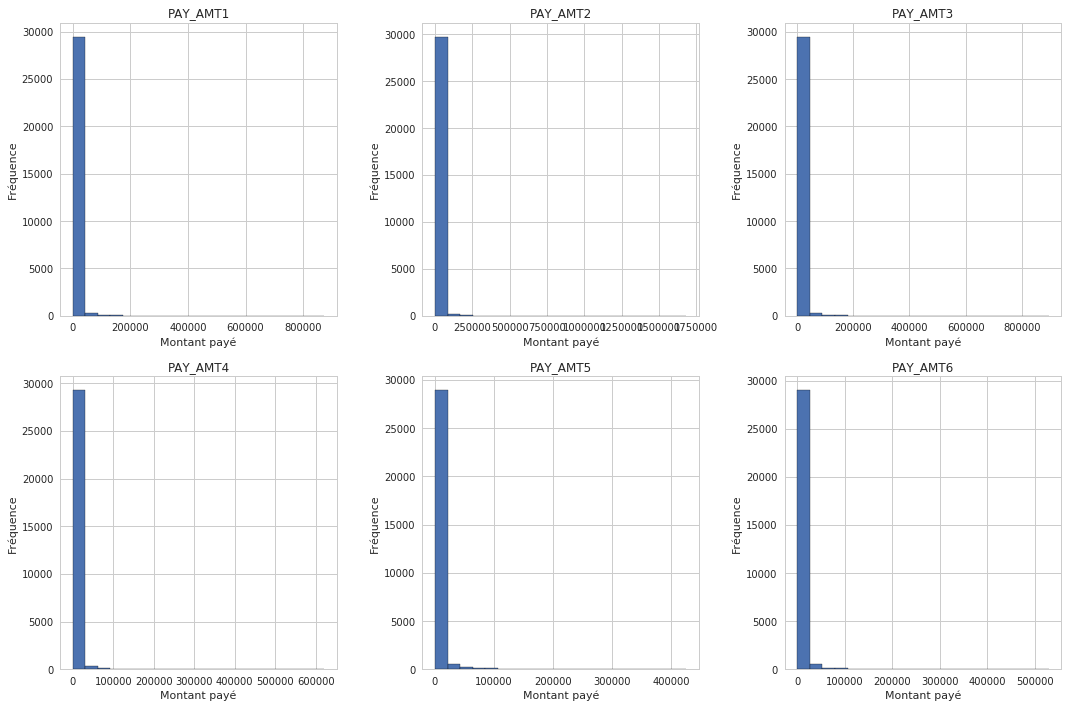

In [52]:
## Tracer les histogrammes pour les variables PAY_AMT

pay = credit[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

plt.figure(figsize=(15, 10))

for i, column in enumerate(pay.columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(pay[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.xlabel("Montant payé")
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


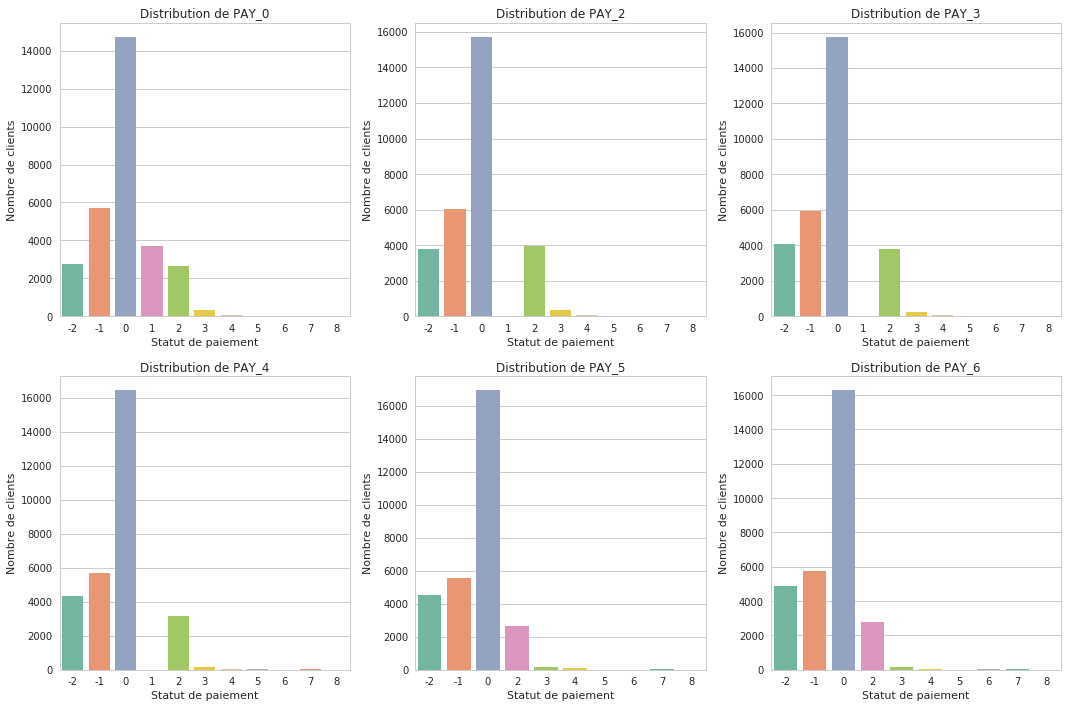

In [53]:
## Tracer les histogrammes pour les variables PAY_

late = credit[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

plt.figure(figsize=(15, 10))

for i, col in enumerate(late.columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=late, x=col, palette='Set2')
    plt.title(f"Distribution de {col}")
    plt.xlabel("Statut de paiement")
    plt.ylabel("Nombre de clients")

plt.tight_layout()
plt.show()

# Distribution du montant du crédit accordé (LIMIT_BAL)

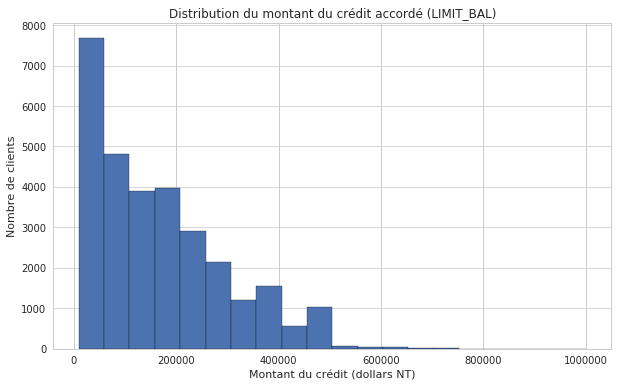

In [15]:
plt.figure(figsize=(10,6))
plt.hist(credit['LIMIT_BAL'], bins=20, edgecolor='black')
plt.title("Distribution du montant du crédit accordé (LIMIT_BAL)")
plt.xlabel("Montant du crédit (dollars NT)")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', alpha=0.75)
plt.show()


la répartition des montants de crédit accordés aux clients. On observe que la majorité des crédits se situe dans une plage [0, 500 000], avec quelques clients bénéficiant de montants beaucoup moins élevés. Cette distribution est utile pour comprendre le profil financier moyen des clients et détecter d’éventuelles valeurs extrêmes (outliers).

# Analyse des clients avec des paiements initiaux très élevés (> 300 000)

In [17]:
# Filtrer les clients ayant un paiement initial (PAY_AMT1) supérieur à 300 000

high_payments = credit[credit['PAY_AMT1'] > 300000][
    ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'BILL_AMT2', 'PAY_AMT1', 'BILL_AMT1', 'default_payment_next_month']
]

# Afficher le résultat
high_payments


,LIMIT_BAL,PAY_0,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,default_payment_next_month
2687,500000.0,-2,-1,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,-1,-1,405016.0,405016.0,6500.0,0
12330,300000.0,1,-1,324392.0,505000.0,-165580.0,0
25431,170000.0,0,-1,167941.0,304815.0,30860.0,0
28003,510000.0,-1,-1,481382.0,493358.0,71121.0,0
28716,340000.0,-1,-1,176743.0,873552.0,139808.0,0
29820,400000.0,1,-1,394858.0,423903.0,396343.0,0
29867,340000.0,-1,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,-1,322228.0,323014.0,348392.0,0


## Analyse des clients avec un paiement élevé au 2e mois (PAY_AMT2 > 300 000)

In [60]:
# Filtrer les clients ayant un paiement très élevé au deuxième mois
high_payment_month2 = credit[credit['PAY_AMT2'] > 300000][[
    'LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
    'PAY_AMT2', 'BILL_AMT2', 'default_payment_next_month'
]]

# Afficher les résultats
high_payment_month2


,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,default_payment_next_month
2592,480000.0,0,0,339176.0,344261.0,38929.0,0
3774,500000.0,0,0,301441.0,302961.0,39356.0,0
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
5400,500000.0,0,0,385228.0,385228.0,8970.0,0
6150,300000.0,0,0,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,0,0,384973.0,384986.0,24201.0,0
11568,430000.0,0,0,354716.0,358689.0,960.0,1
11853,360000.0,1,0,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


## Interprétation synthétique

- Ces clients présentent des limites de crédit élevées, souvent supérieures à 300 000.
- Les montants facturés (BILL_AMT2, BILL_AMT3) sont globalement cohérents avec les paiements effectués.
- Le statut de paiement (PAY_2, PAY_3) est à 0 dans la quasi-totalité des cas : ils étaient à jour.
- Malgré ces paiements importants, quelques clients ont quand même fait défaut (default_payment_next_month = 1), ce qui peut signaler un changement soudain de situation ou un comportement atypique.

Conclusion : Ces profils ne paraissent pas suspects. Ils témoignent de clients solvables, avec quelques cas à surveiller.

# Analyse approfondie des corrélations avec la variable cible

Maintenant que les anomalies ont été identifiées et corrigées, nous pouvons explorer les corrélations entre les différentes variables et la variable cible (default_payment_next_month).

L’objectif est de :

- Évaluer la pertinence de chaque variable pour la prédiction du défaut de paiement,
- Mieux comprendre leur signification et comportement.

In [27]:
# credit.groupby(['SEX', 'default_payment_next_month']).size()

credit.groupby([credit['SEX'].replace({1: 'Homme', 2: 'Femme'}), credit['default_payment_next_month'].replace({0: 'Pas de défaut', 1: 'Défaut'})]).size()


SEX    default_payment_next_month
Femme  Défaut                         3763
       Pas de défaut                 14349
Homme  Défaut                         2873
       Pas de défaut                  9015
dtype: int64

- Les hommes ont un taux de défaut plus élevé (≈ 24.2 %) que les femmes (≈ 20.8 %).

- Bien que les femmes soient plus nombreuses dans le dataset, leur proportion de défaut est légèrement inférieure.

- Cela peut indiquer que le sexe est une variable potentiellement pertinente pour prédire le risque de défaut.

In [28]:
# gender = credit.groupby([credit['SEX'].replace({1: 'Homme', 2: 'Femme'}), 'default_payment_next_month']).size().unstack(1)

gender = credit.groupby([
    credit['SEX'].replace({1: 'Homme', 2: 'Femme'}),
    credit['default_payment_next_month'].replace({0: 'Pas de défaut', 1: 'Défaut'})
]).size().unstack()

gender


default_payment_next_month,Défaut,Pas de défaut
SEX,,
Femme,3763,14349
Homme,2873,9015


- Les femmes ont un nombre plus élevé de cas sans défaut comparé aux hommes.

- Le nombre de défauts est aussi plus important chez les femmes en valeur absolue, mais il faudra comparer les proportions (taux de défaut) pour une analyse plus fine.

- Cette répartition donne un aperçu initial de la relation entre le genre et le défaut de paiement

In [29]:
ct = pd.crosstab(
    credit['SEX'].replace({1: 'Homme', 2: 'Femme'}),
    credit['default_payment_next_month'].replace({0: 'Pas de défaut', 1: 'Défaut'})
)

# Réorganiser les colonnes pour que "Pas de défaut" soit en premier
ct = ct[['Pas de défaut', 'Défaut']]

ct


default_payment_next_month,Pas de défaut,Défaut
SEX,,
Femme,14349,3763
Homme,9015,2873


On observe que le taux de défaut est légèrement plus élevé chez les hommes (24,14 %) que chez les femmes (20,78 %). Cela peut indiquer que le genre est un facteur pertinent à considérer dans la modélisation du risque de défaut.

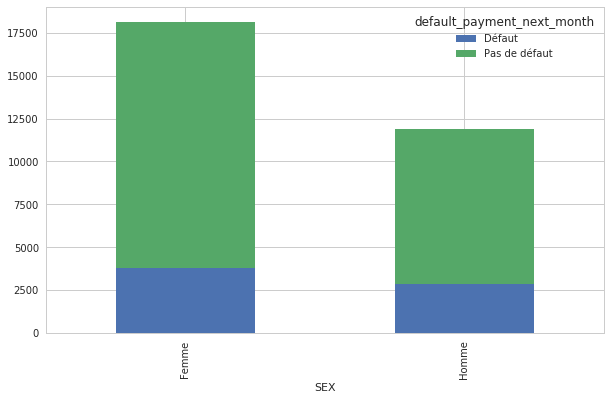

In [30]:
gender.plot(kind='bar', stacked = True)

# Distribution de l’âge selon le défaut de paiement

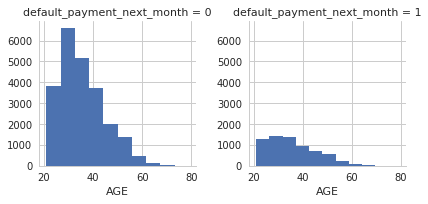

In [42]:
g = sns.FacetGrid(credit, col = 'default_payment_next_month')
g.map(plt.hist, 'AGE')

Ce graphique affiche la distribution des âges des clients, séparée en deux groupes : **ceux qui ont défaut de paiement (1)** et **ceux qui n’en ont pas (0)**. On peut ainsi comparer visuellement si l’âge semble influencer le risque de défaut.

- On observe souvent que la répartition des âges est similaire dans les deux groupes, avec une concentration autour des 30-40 ans.
- Il peut cependant y avoir des différences subtiles dans certaines tranches d’âge, ce qui pourrait être utile pour améliorer les modèles prédictifs.

# Distribution de l’âge selon le défaut de paiement et le sexe

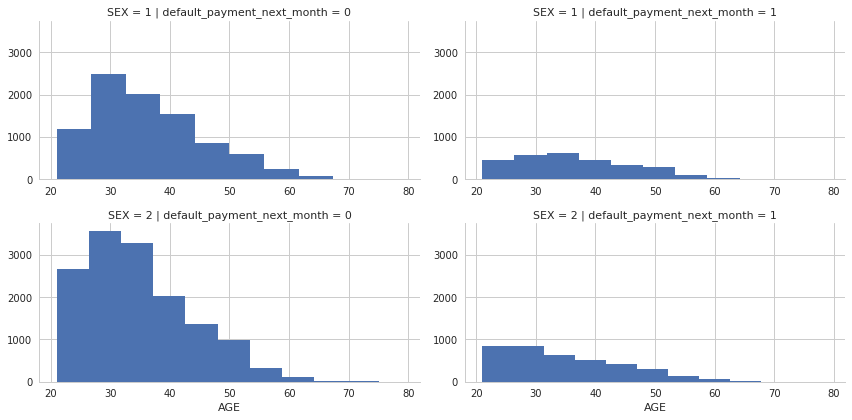

In [51]:
g = sns.FacetGrid(credit, col='default_payment_next_month', row='SEX',  aspect=2)
g.map(plt.hist, 'AGE')
plt.show()

# 1 : Homme
# 2 : Femme
# 0: 'Pas de défaut', 1: 'Défaut'

Les graphiques montrent la répartition des âges des clients selon leur genre (homme/femme) et s'ils ont fait défaut de paiement le mois suivant. On observe que :
- Les clients plus jeunes semblent avoir un taux de défaut plus élevé.
- La distribution d’âge est globalement similaire entre hommes et femmes.
- Les clients sans défaut sont globalement plus âgés, ce qui peut indiquer que l’âge est un facteur de risque pour le défaut.

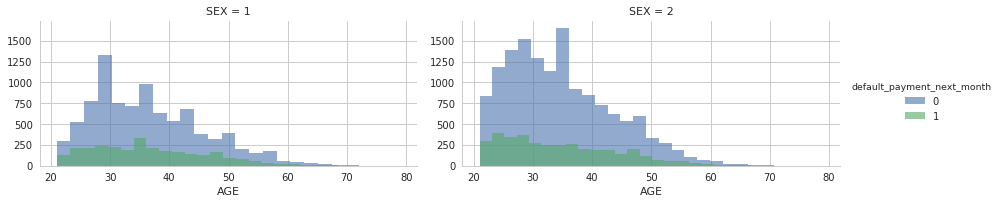

In [53]:
g = sns.FacetGrid(credit, col='SEX', hue='default_payment_next_month',a)
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()



# **Une piste d'amélioration** : sélection et transformation des variables

Une piste à explorer pour améliorer la précision du modèle serait de mieux sélectionner les variables en entrée. Par exemple, certaines variables comme PAY_n ou SEX peuvent être ignorées ou remplacées par des variables combinées plus pertinentes (SE_MA, AgeBin, etc.). Cela permettrait de réduire le bruit, de limiter le surapprentissage et de mieux capter les signaux utiles pour la prédiction.

# **Conclusion**

L’analyse réalisée a permis de mieux comprendre les données, d’identifier les déséquilibres présents, et d’envisager plusieurs axes d’amélioration (**traitement des classes déséquilibrées**, réduction de dimension, feature engineering...). Bien que les premiers résultats ne soient pas parfaits, ils servent de point de départ solide pour développer un modèle plus robuste et plus précis.